# TP - "Fusion de Données"

On considère un espace quadrillé en $n$ lignes et $m$ colonnes. 
Des capteurs surveillent un navire present dans cette zone. 
L'objectif est de fusionner les informations fournies par les capteurs à l'aide de la règle de Dempster.

Sur ce quadrillage, un ensemble de point (ou "grille") peut etre representé par un tableau de booleens 
à deux dimensions ( $n$ lignes et $m$ colonnes) 

Dans ce contexte,   une fonction de masse à $k$ elements focaux  decrite par deux listes: la liste $EF$ est celle des elements focaux de la bpa, la liste $p$ celle des poids correspondants

Le programme python suivant implemente les concepts de grille et de fonction de masse (en particulier de fonction de masse generée par un capteur ligne, colonne ou point).





In [93]:
import numpy as np
import random 
import jsonpickle as json
import matplotlib.pyplot as plt
import matplotlib
import sys

In [94]:
## global : on traite de grilles n lignes m colonnes
n = 15
m = 10

In [95]:
###  Creer des grilles particulieres

# une grille de d lignes autour de la ligne l (soit 2d + 1 lignes)
def lines(l,d):
    a =  np.zeros((n,m), bool)
    for i in range(max(l-d,0), min(l+d+1,n  )):
        for  j in range(m):
            a[i][j] = 1
    return a

# une grille de d colonnes autour de la colonne c (soit 2d + 1 colonnes)
def cols(c,d):
    a =  np.zeros((n, m), bool)
    for i in range(n):
        for j in range(max(c-d,0), min(c+d+1, m  )):
            a[i][j] = 1
    return a

# une grille contenant un carre de points autour du point l,c (2d+1  x 2d+1 points)
def autour(l,c,d):
    a =  np.zeros((n,m), bool)
    for i in range(max(l-d,0), min(l+d+1,n)):
         for j in range(max(c-d,0), min(c+d+1, m)):
            a[i][j] = 1
    return a

# une grille contant un carre de points autour du point l,c (2d+1  x 2d+1 points)
def zone(l,c,droite,dessous):
    a =  np.zeros((n,m), bool)
    for i in range(l, min(l+dessous,n)):
         for j in range(c, min(c+droite, m)):
            a[i][j] = 1
    return a


# une bpa est donc une liste d'elements focaux et la liste des poids correspondants
class bpa:
    
    def __init__(self): 
        self.EF=[]
        self.p = []
     
    def toJSON(self):
        return json.dumps(self, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)
    
    def size(self):
        res = sys.getsizeof(self.p)
        for i in range(len(self.EF)):
            res = res + sys.getsizeof(self.EF[i])
        return res
        
# des petits utilitaires pour la creation de bpa
                          
    def addLineEF(self,l,p0):
        self.p.append(p0)
        self.EF.append(lines(l,0))
        
    def addLinesEF(self,l, marge, p0):
        self.p.append(p0)
        self.EF.append(lines(l,marge))
        
    def addColEF(self,c,p0):
        self.p.append(p0)
        self.EF.append(cols(c,0))
       
        
    def addColsEF(self,c, marge, p0):
        self.p.append(p0)
        self.EF.append(cols(c,marge))
         
        
    def addAutourEF(self,l,c,d,p0):
        self.p.append(p0)
        self.EF.append(autour(l,c,d))
        
    def addFullGridEF(self,p0):
        self.p.append(p0)
        self.EF.append(np.ones((n, m), bool))
        
        
    def addEmptyEF(self,p0):
        self.p.append(p0)
        self.EF.append(np.zeros((n, m), bool))
          
    def isCorrect(self):
        s = 0
        r = True
        for x in range(len(self.p)): 
            s = s + self.p[x]
            if (not(np.any(self.EF[x])) and self.p[x]>0):
                print('poids non nul sur l enseble vide,EF numero'+ str(x))
                print(self.EF[x])
                print(self.p[x])
                r = False
        if (s < 1): print("bpa sous normalisee")   
        if (s > 1): print("bpa  somme > 1")   
        return r & ( s == 1)
    
# afficher des bpa     
    def degreInc(self):
        s = 0
        for x in range(len(self.p)): 
            if (not(np.any(self.EF[x])) and self.p[x]>0):
                s = s + self.p[x]           
        return s
    
    def show(self): 
        s = 0
        for x in range(len(self.EF)):
            if (np.any(self.EF[x])):
                print(self.p[x])
                print(self.EF[x])
            else:
                s = s + self.p[x]
                print(self.p[x])
                print(self.EF[x])
        if s > 0:
            print("degre d incoherence ", s)
            
    def pignistic(self):
        a =  np.zeros((n, m), float)
        for x in range(len(self.EF)):
            size =  np.count_nonzero(self.EF[x])
            if size>0:
                for i in range(n):
                    for j in range( m  ):
                        a[i][j] = a[i][j] + self.EF[x][i][j] / size
        return a
    
def pigshow(b):
       
    if isinstance(b,bpa):
        plt.xticks(np.arange(0, m, step=max(1,m//10)))
        plt.yticks(np.arange(0, n, step=max(1,n//10)))
        plt.imshow(b.pignistic(), interpolation='none', cmap='Greens')
    else:
        plt.xticks(np.arange(0, m, step=max(1,m//10)))
        plt.yticks(np.arange(0, n, step=max(1,n//10)))
        plt.imshow(b, interpolation='none', cmap='Blues')
       
    # for i in np.arange(m):
    #     for j in np.arange(n):
    #         plt.text( x=i, y=j, s=format(pig[j][i], '.2f'), color='black',
    #           fontsize=8, wrap=False, horizontalalignment='center')
    fig = plt.gcf()
    # ax = fig.add_axes([0.85, 0.5, 0.04, 0.4])
    # plt.colorbar( cax = ax )

Un capteur (un capteur ligne par exemple, ou un capteur colonne) genere  une bpa.

En particulier, la fonction $CapteurCol(col,prec.,fiab)$ modélise un capteur qui indique de la cible est en colonne $col$, avec une precision de + ou - $prec$ (les autres colonnes etant exclues) et une fiabilité de $fiab$: elle genere une bpa à deux element focaux: la colonne $col$, de poids $fiab$,  et l'ensemble des $prec$ colonnes à gauche et à droite de cette colonne, de poids $1 - fiab$. 

De même, $CapteurLigne(lin,prec.,fiab)$  modélise un capteur qui indique de la cible est en ligne $lin$, avec une precision de + ou - $prec$ et $CapteurPoint(l, c, marge, fiab)$  modélise un capteur qui indique de la cible est en au point (l,c), avec une precision de + ou - $marge$  et une fiabilité de $fiab$

In [96]:
# la creation de bpa correspondant à des capteurs       

class   CapteurPoint(bpa):
    
    def   __init__(self,l, c, marge, fiab):
        super().__init__()
        self.addAutourEF(l,c,0,fiab)
        self.addAutourEF(l,c, marge, 1 - fiab)
        
    def   __init__(self,l, c, fiab):
        super().__init__()
        self.addAutourEF(l,c,0,fiab)
        self.addFullGridEF( 1 - fiab)
        
class   CapteurLigne(bpa):
    
    def   __init__(self, l, marge, fiab):
        super().__init__()
        self.addLineEF(l,fiab)
        self.addLinesEF(l, marge, 1 - fiab)
        
class   CapteurCol(bpa):
    
    def   __init__(self, c, marge, fiab):
        super().__init__()
        self.addColEF(c,fiab)
        self.addColsEF(c, marge, 1 - fiab)
        
class   CapteurFoo(bpa):
    def   __init__(self):
        super().__init__()
        self.addFullGridEF(1)
        
class   CapteurColFull(CapteurCol):       
    
    def   __init__(self, c, marge, fiab):
        super().__init__(c, marge, fiab)
        self.p[1] = self.p[1] / 2
        p_restant = 1 - self.p[1] - self.p[0]
        marg = marge * 2
        

        while ( (c + marg < m) and (c- marg > 0)):
            self.addColsEF(c, marg, p_restant / 2)
            marg = marg * 2
            p_restant = p_restant - (p_restant / 2)
        
        self.addFullGridEF(p_restant)
        


class   CapteurLigneFull(CapteurLigne):       
    
    def   __init__(self, l, marge, fiab):
        super().__init__(l, marge, fiab)
        self.p[1] = self.p[1] / 2
        p_restant = 1 - self.p[1] - self.p[0]
        marg = marge * 2
        

        while ( (l + marg < n) and (l- marg > 0)):
            self.addColsEF(l, marg, p_restant / 2)
            marg = marg * 2
            p_restant = p_restant - (p_restant / 2)
        
        self.addFullGridEF(p_restant)    

# 1. Prise en main

le code qui suit travaille sur des grilles 10 lignes et 7 colonnes.
Explorer les deux bpa X et Y crees 

Combien X contient d'element focaux ? la bpa est elle normalisée ?

Afficher la grille A




In [97]:
def build_heatmap(data, ax=None, cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}", textcolors=("black", "white"), threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def display_heatmap(matrix):
    fig, ax = plt.subplots()

    im, cbar = build_heatmap(matrix, ax=ax, cmap="Blues")
    texts = annotate_heatmap(im)

    fig.tight_layout()
    plt.show()

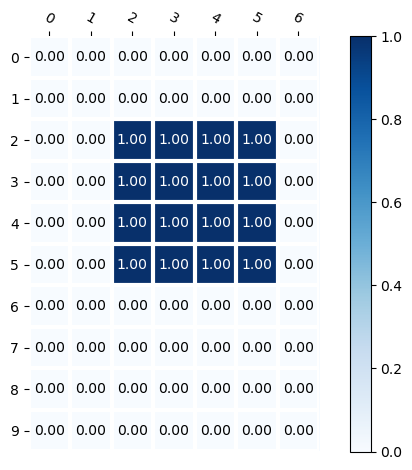

In [100]:
n = 10
m = 7

X = CapteurCol(3,1,0.9)
Y = CapteurLigne(2,1,0.9)

# X.show()
# pigshow(X)

A = zone(2,2,4,4)
display_heatmap(A)

[array([[False, False, False,  True, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False,  True, False, False, False],
        [False, False, False,  True, False, False, False]]),
 array([[False, False,  True,  True,  True, False, False],
        [False, False,  True,  True,  True, False, False],
        [False, False,  True,  True,  True, False, False],
        [False, False,  True,  True,  True, False, False],
        [False, False,  True,  True,  True, False, False],
        [False, False,  True,  True,  True, False, False],
        [False, False,  True,  True,  True, False, Fal

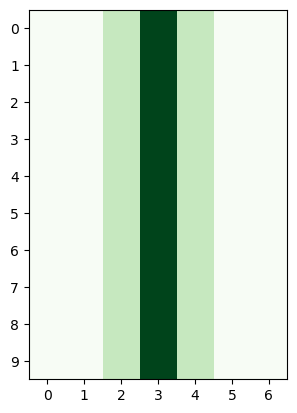

In [106]:
pigshow(X)
X.EF

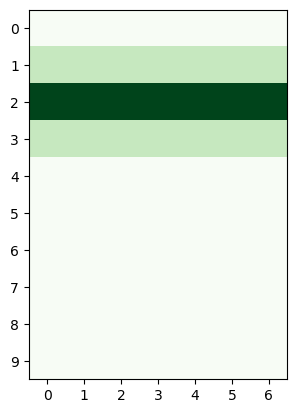

In [ ]:
pigshow(Y)

# TODO  1:

Implementer les fonctions Bel(bpa: m, grille: a), Pl(bpa: m, grille: a) - calculer par exemple Bel(X,A), Pl(X,A), Bel(Y,A) et Pl(Y,A) pour les   bpa  et la grille precedentes


In [116]:
def bel(b, a):
    return np.sum([b.p[x] for x in range(len(b.EF)) if np.all(np.less_equal(b.EF[x], a))])

def pl(b, a):
    return np.sum([b.p[x] for x in range(len(b.EF)) if np.any(np.logical_and(b.EF[x], a))])

In [117]:
print(bel(X,A))
print(pl(X,A))

0.0
1.0


# TODO 2:

Implementer la fonction fusion(bpa: m1, bpa: m2) qui rend la bpa obtenue en fusionnant m1 et m2 par la regle de Dempster. Calculer par exemple Z = fusion(X,Y) et Bel(Z,A)

In [118]:
def fusion(a,b):
    c = bpa()
    for i in range(len(a.EF)):
        for j in range(len(b.EF)):
            c.EF.append(np.logical_and(a.EF[i], b.EF[j]))
            c.p.append(a.p[i] * b.p[j])
    return c

0.9

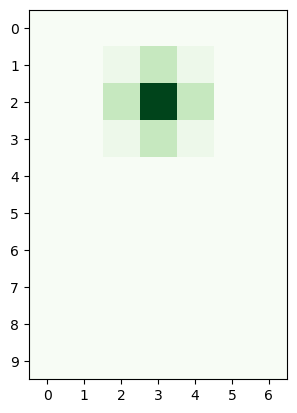

In [119]:
Z=fusion(X,Y)
pigshow(Z)
bel(Z,A)

# TODO 3:

Les classes ci dessous fournissent des modeles de capteurs un peu plus perfectionnés. Imaginer un protocole de test qui mesure la complexité (en temps, en espace) de la fusion en fonction du nombre de bpa à fusionner (ou un nombre de ses elements focaux). Voici ci dessous un protocole de test assez naif



In [120]:
def test(iter:int):
    x = CapteurFoo()
    marge=3
    fiab=0.2
    for i in range(iter):
        z=CapteurColFull(i,marge,fiab)
        x=fusion(x,z)
        print(len(x.EF), x.size())

In [121]:
test(12)

3 682
9 1966
27 5658
81 16830
243 50314
729 150478
2187 451258
6561 1352158
19683 4070250
59049 12191662
177147 36518682
531441 109913630


# TODO 4

En supposant que le cout d'une mission sur une zone est egal à cout(zone) =  fixe  + (size(zone) fixe / 2), et rapporte  gain (par exemple avec fixe = 100 et gain = 1000), 
implementer la fonction qui calcule l'utilité pessimiste de l'envoi d une mission sur une zone:
    
upes(nd.array,gain,fixe)